In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro

#ARIMA
from statsmodels.tsa.arima_model import ARIMA



#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#데이터 scaling => 거리기반 알고리즘은 필수!!!
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# 한글 폰트 적용
font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

In [3]:
# 데이터 구성하기(MFG_TAT)
df_tat = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_TAT_NULL_COL_OUT.csv", engine="python",encoding='EUC-KR')
df_tat.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,...,6900,6447,530,76,333,88,396,86,7140,10074
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,...,6693,6600,530,80,438,82,381,84,6956,10075
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,...,6747,6597,530,80,420,92,396,86,6840,10645
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,...,7137,6420,530,78,429,78,399,90,6720,10076
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,...,7527,6453,540,76,363,82,393,84,7110,10074


In [4]:

df_process = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_PROCESS_NULL_COL_OUT.csv", engine="python",encoding='EUC-KR')
df_process.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,...,82.8,84.0,443,419,392,372,4115.0,3973.0,4432,2506.0
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,...,80.3,81.8,445,423,395,374,3642.0,4097.0,4499,2573.0
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,...,81.2,82.2,444,421,393,372,4063.0,3972.0,4460,2502.0
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,...,83.0,84.0,444,420,393,372,4131.0,4011.0,4466,2522.0
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,...,80.1,82.0,443,420,392,372,3632.0,4073.0,4482,2584.0


In [5]:

df_mc = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_MACHINE_NULL_COL_OUT.csv", engine="python",encoding='EUC-KR')
df_mc.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [6]:
# df_tat['JUDGE'] = df_tat['JUDGE'].map({'양품':0,'명점':1})
# df_process['JUDGE'] = df_process['JUDGE'].map({'양품':0,'명점':1})
# df_mc['JUDGE'] = df_mc['JUDGE'].map({'양품':0,'명점':1})


# 설비 유의차가 있는 공정 AG_RTD의 설비 작업 조건 - vital few 도출

In [7]:
# drop: X변수와 변수 삭제
df_raw_x = df_process[['AG_RTD_TEMP_GLASS_START','AG_RTD_TEMP_GLASS_END','AG_RTD_TEMP_WALL_START','AG_RTD_TEMP_WALL_MAX','AG_RTD_PRES_START','AG_RTD_PRES_END','AG_RTD_TEMP_GLASS_OUT','AG_RTD_TEMP_HOOD_START','AG_RTD_TEMP_HOOD_MAX']]
df_raw_y = df_process["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [8]:
df_raw_x.head()

,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX
0,46.0,138.0,76.0,102.0,321.0,434.0,41.3,92.0,93.0
1,46.0,139.0,77.9,101.0,398.8,339.8,45.6,93.0,93.0
2,45.0,138.0,77.0,102.0,358.0,347.0,43.6,93.0,94.0
3,46.1,138.0,77.8,101.1,356.4,438.1,45.1,93.0,93.0
4,47.0,138.0,77.8,101.4,327.8,398.4,45.7,92.0,93.0


In [9]:
df_raw_y[:5]

0    양품
1    양품
2    양품
3    양품
4    양품
Name: JUDGE, dtype: object

In [10]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 9)
train data Y size:(2787,)
test data X size:(1195, 9)
test data Y size:(1195,)


In [11]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합
y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.997
Score on test set: 0.939
Confusion matrix: 
[[  71   40]
 [  33 1051]]


In [59]:
df = pd.DataFrame(y_pred)
# df.head()
# y_pred.unique()
# y_pred.value_counts()
# df.value_counts()
# df[0].unique()
df[0].value_counts()

양품    1091
명점     104
Name: 0, dtype: int64

In [13]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,AG_RTD_TEMP_GLASS_OUT,0.504
2,AG_RTD_TEMP_WALL_START,0.098
5,AG_RTD_PRES_END,0.093
4,AG_RTD_PRES_START,0.088
3,AG_RTD_TEMP_WALL_MAX,0.070
1,AG_RTD_TEMP_GLASS_END,0.041
0,AG_RTD_TEMP_GLASS_START,0.039
8,AG_RTD_TEMP_HOOD_MAX,0.036
7,AG_RTD_TEMP_HOOD_START,0.031


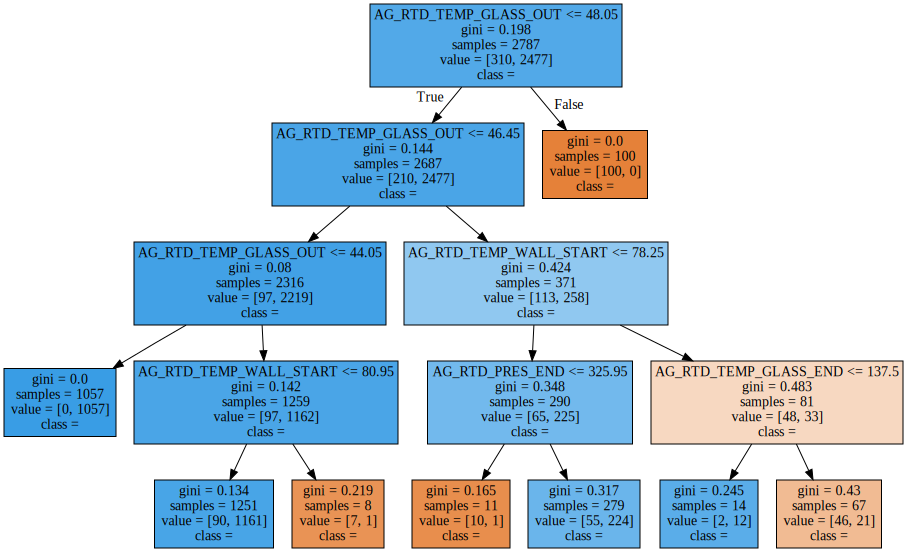

In [60]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True)


with open('tree_low.dot') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# 설비 유의차가 있는 공정 DIELEC_FIRE의 설비 작업 조건 - vital few 도출

In [61]:
# drop: X변수와 변수 삭제
df_raw_x = df_process[['DIELEC_FIRE_TEMP_KEEP_CH01','DIELEC_FIRE_TEMP_ANEAL_CH01','DIELEC_FIRE_TEMP_ANEAL_CH02','DIELEC_FIRE_TEMP_ANEAL_CH03','DIELEC_FIRE_EXHAUST_HEAT1','DIELEC_FIRE_EXHAUST_HEAT2','DIELEC_FIRE_EXHAUST_HEAT3','DIELEC_FIRE_EXHAUST_HEAT4','DIELEC_FIRE_EXHAUST_HEAT5','DIELEC_FIRE_EXHAUST_HEAT6','DIELEC_FIRE_EXHAUST_HEAT7']]
df_raw_y = df_process["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [62]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 11)
train data Y size:(2787,)
test data X size:(1195, 11)
test data Y size:(1195,)


In [63]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합

y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.970
Score on test set: 0.956
Confusion matrix: 
[[  69   42]
 [  11 1073]]


In [65]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,DIELEC_FIRE_EXHAUST_HEAT5,0.254
7,DIELEC_FIRE_EXHAUST_HEAT4,0.133
6,DIELEC_FIRE_EXHAUST_HEAT3,0.117
10,DIELEC_FIRE_EXHAUST_HEAT7,0.109
4,DIELEC_FIRE_EXHAUST_HEAT1,0.076
0,DIELEC_FIRE_TEMP_KEEP_CH01,0.071
5,DIELEC_FIRE_EXHAUST_HEAT2,0.068
2,DIELEC_FIRE_TEMP_ANEAL_CH02,0.056
3,DIELEC_FIRE_TEMP_ANEAL_CH03,0.055
9,DIELEC_FIRE_EXHAUST_HEAT6,0.032


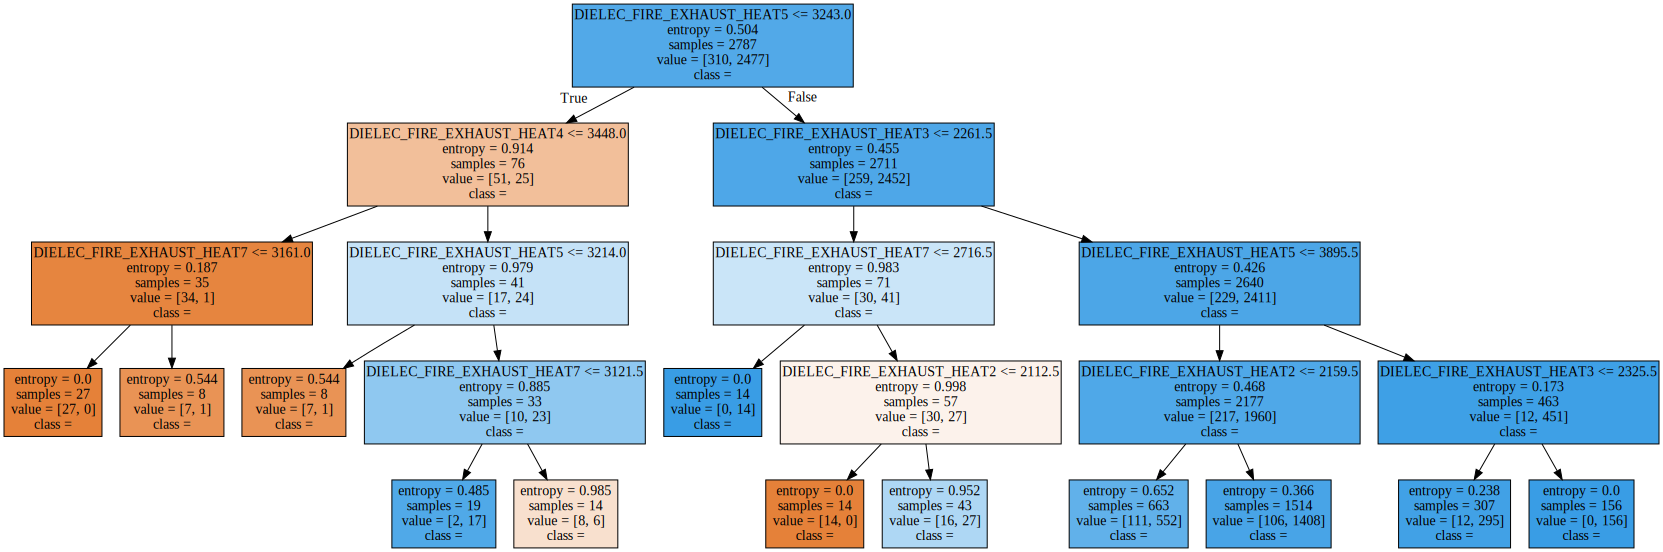

In [70]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(criterion='entropy',random_state=1234, min_samples_leaf=8, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

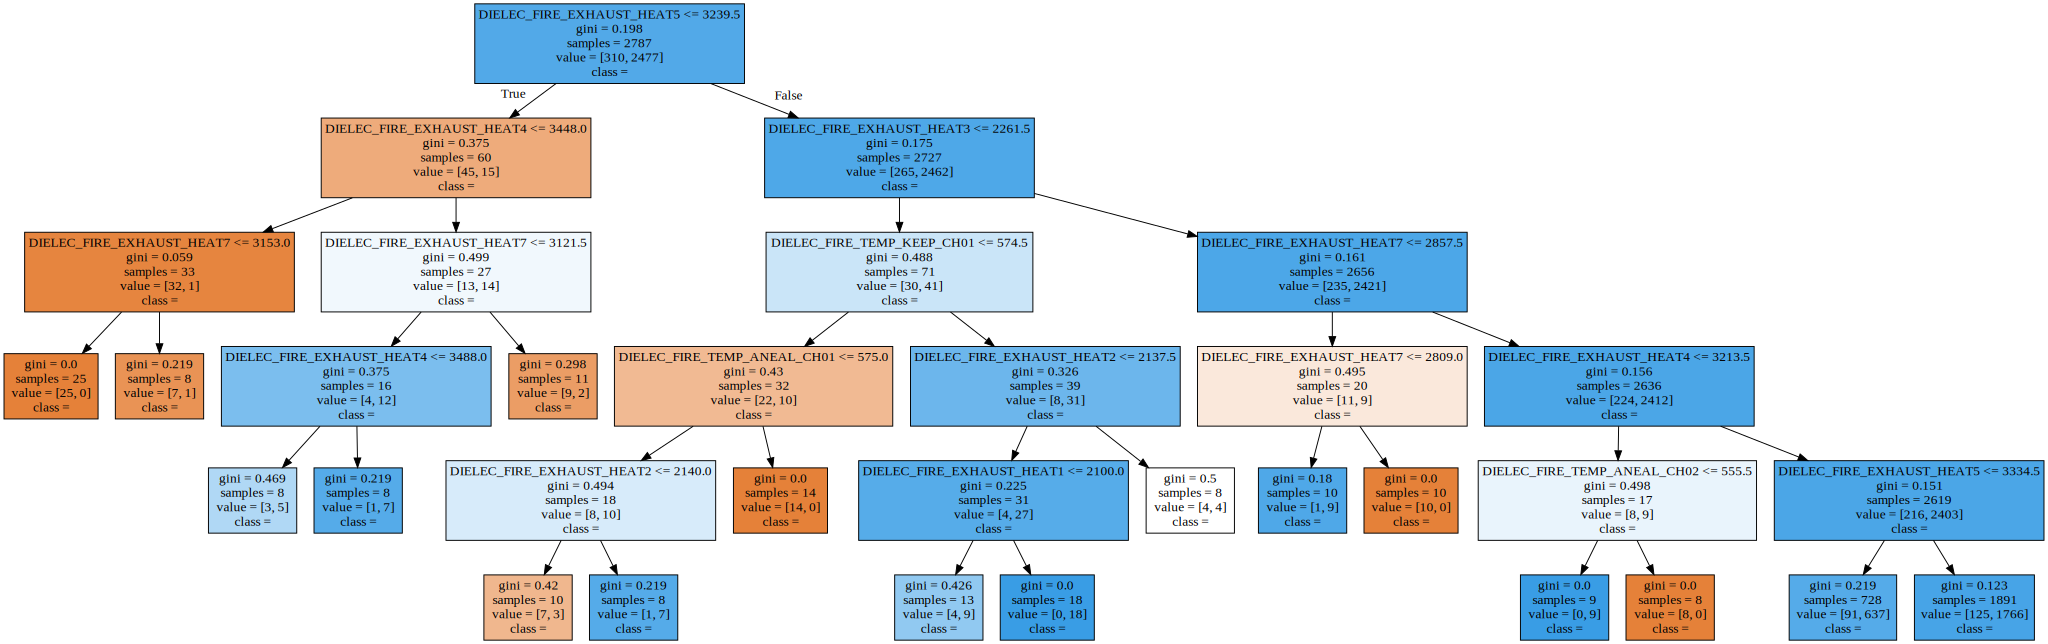

In [69]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(criterion='gini',random_state=1234, min_samples_leaf=8, max_depth=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

In [71]:
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:100%!important;}</style>"))

# 설비 유의차 있는 공정 아니지만 

# BLACK_RTD의 설비 작업 조건 - vital few 도출

In [96]:
# drop: X변수와 변수 삭제
df_raw_x = df_process[['BLACK_RTD_TEMP_GLASS_START','BLACK_RTD_TEMP_GLASS_END','BLACK_RTD_TEMP_WALL_START','BLACK_RTD_TEMP_WALL_MAX','BLACK_RTD_PRES_START','BLACK_RTD_PRES_END','BLACK_RTD_TEMP_GLASS_OUT','BLACK_RTD_TEMP_HOOD_START','BLACK_RTD_TEMP_HOOD_MAX']]
df_raw_y = df_process["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [97]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 9)
train data Y size:(2787,)
test data X size:(1195, 9)
test data Y size:(1195,)


In [98]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합

y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.966
Score on test set: 0.942
Confusion matrix: 
[[  54   57]
 [  12 1072]]


In [100]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,BLACK_RTD_TEMP_GLASS_END,0.156
4,BLACK_RTD_PRES_START,0.152
2,BLACK_RTD_TEMP_WALL_START,0.135
6,BLACK_RTD_TEMP_GLASS_OUT,0.133
5,BLACK_RTD_PRES_END,0.119
0,BLACK_RTD_TEMP_GLASS_START,0.116
8,BLACK_RTD_TEMP_HOOD_MAX,0.073
7,BLACK_RTD_TEMP_HOOD_START,0.060
3,BLACK_RTD_TEMP_WALL_MAX,0.057


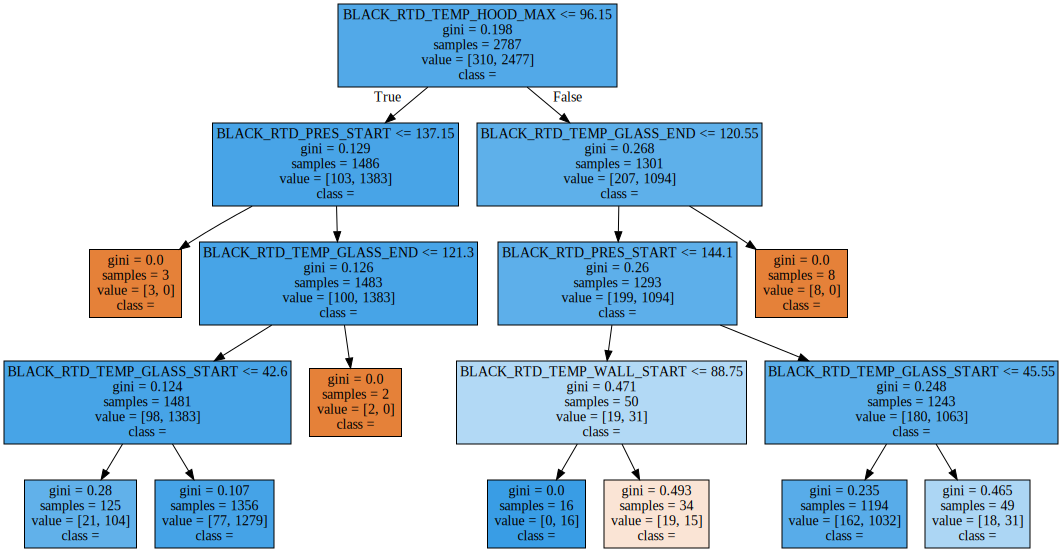

In [101]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='black.dot',class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('black.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

# BUS_DEVELOP의 설비 작업 조건 - vital few 도출

In [102]:
# drop: X변수와 변수 삭제
df_raw_x = df_process[['BUS_DEVELOP_TEMP_OVEN1','BUS_DEVELOP_TEMP_OVEN2','BUS_DEVELOP_TEMP_OVEN3','BUS_DEVELOP_TEMP_TANK1','BUS_DEVELOP_TEMP_TANK2','BUS_DEVELOP_TEMP_TANK3','BUS_DEVELOP_PRES2','BUS_DEVELOP_PRES3']]
df_raw_y = df_process["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [103]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 8)
train data Y size:(2787,)
test data X size:(1195, 8)
test data Y size:(1195,)


In [104]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [105]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합

y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))

Score on training set: 0.967
Score on test set: 0.953
Confusion matrix: 
[[  67   44]
 [  12 1072]]


In [106]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,BUS_DEVELOP_TEMP_TANK2,0.410
5,BUS_DEVELOP_TEMP_TANK3,0.205
7,BUS_DEVELOP_PRES3,0.148
3,BUS_DEVELOP_TEMP_TANK1,0.086
0,BUS_DEVELOP_TEMP_OVEN1,0.054
6,BUS_DEVELOP_PRES2,0.036
1,BUS_DEVELOP_TEMP_OVEN2,0.033
2,BUS_DEVELOP_TEMP_OVEN3,0.027


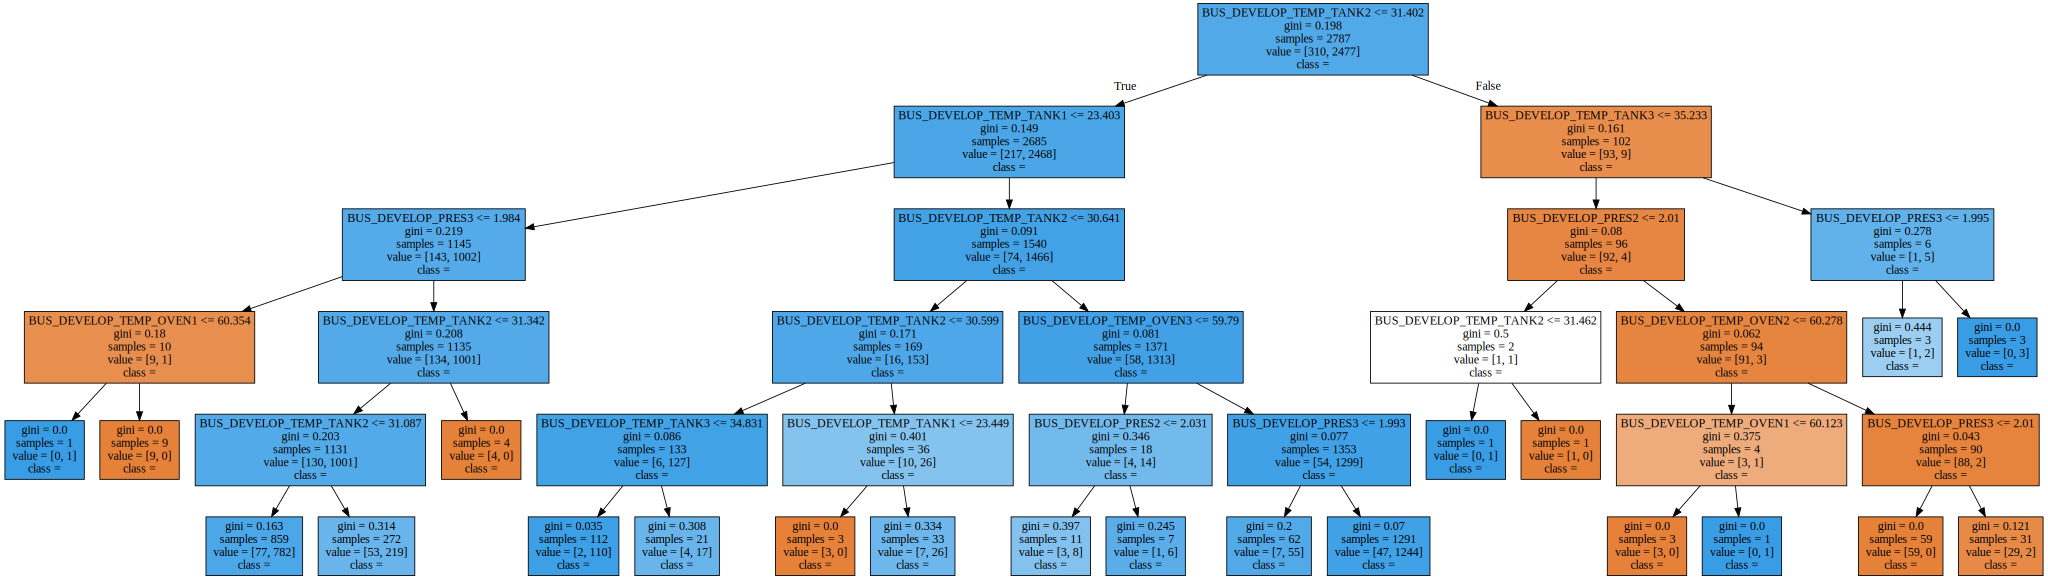

In [107]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, max_depth=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='BUS_DEVELOP.dot',class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('BUS_DEVELOP.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

# BUS_FIRE의 설비 작업 조건 - vital few 도출

In [108]:
# drop: X변수와 변수 삭제
df_raw_x = df_process[['BUS_FIRE_TEMP_KEEP_CH01','BUS_FIRE_TEMP_KEEP_CH02','BUS_FIRE_TEMP_KEEP_CH03','BUS_FIRE_TEMP_ANEAL_CH01','BUS_FIRE_TEMP_ANEAL_CH02','BUS_FIRE_TEMP_ANEAL_CH03']]
df_raw_y = df_process["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [109]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 6)
train data Y size:(2787,)
test data X size:(1195, 6)
test data Y size:(1195,)


In [110]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [111]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합

y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))



Score on training set: 0.959
Score on test set: 0.944
Confusion matrix: 
[[  52   59]
 [   8 1076]]


In [115]:
df = pd.DataFrame(df_test_y)
# df.head()
# y_pred.unique()
# y_pred.value_counts()
# df.value_counts()
# df[0].unique()
df['JUDGE'].value_counts()

양품    1084
명점     111
Name: JUDGE, dtype: int64

In [112]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BUS_FIRE_TEMP_KEEP_CH03,0.246
4,BUS_FIRE_TEMP_ANEAL_CH02,0.208
3,BUS_FIRE_TEMP_ANEAL_CH01,0.162
0,BUS_FIRE_TEMP_KEEP_CH01,0.144
1,BUS_FIRE_TEMP_KEEP_CH02,0.140
5,BUS_FIRE_TEMP_ANEAL_CH03,0.099


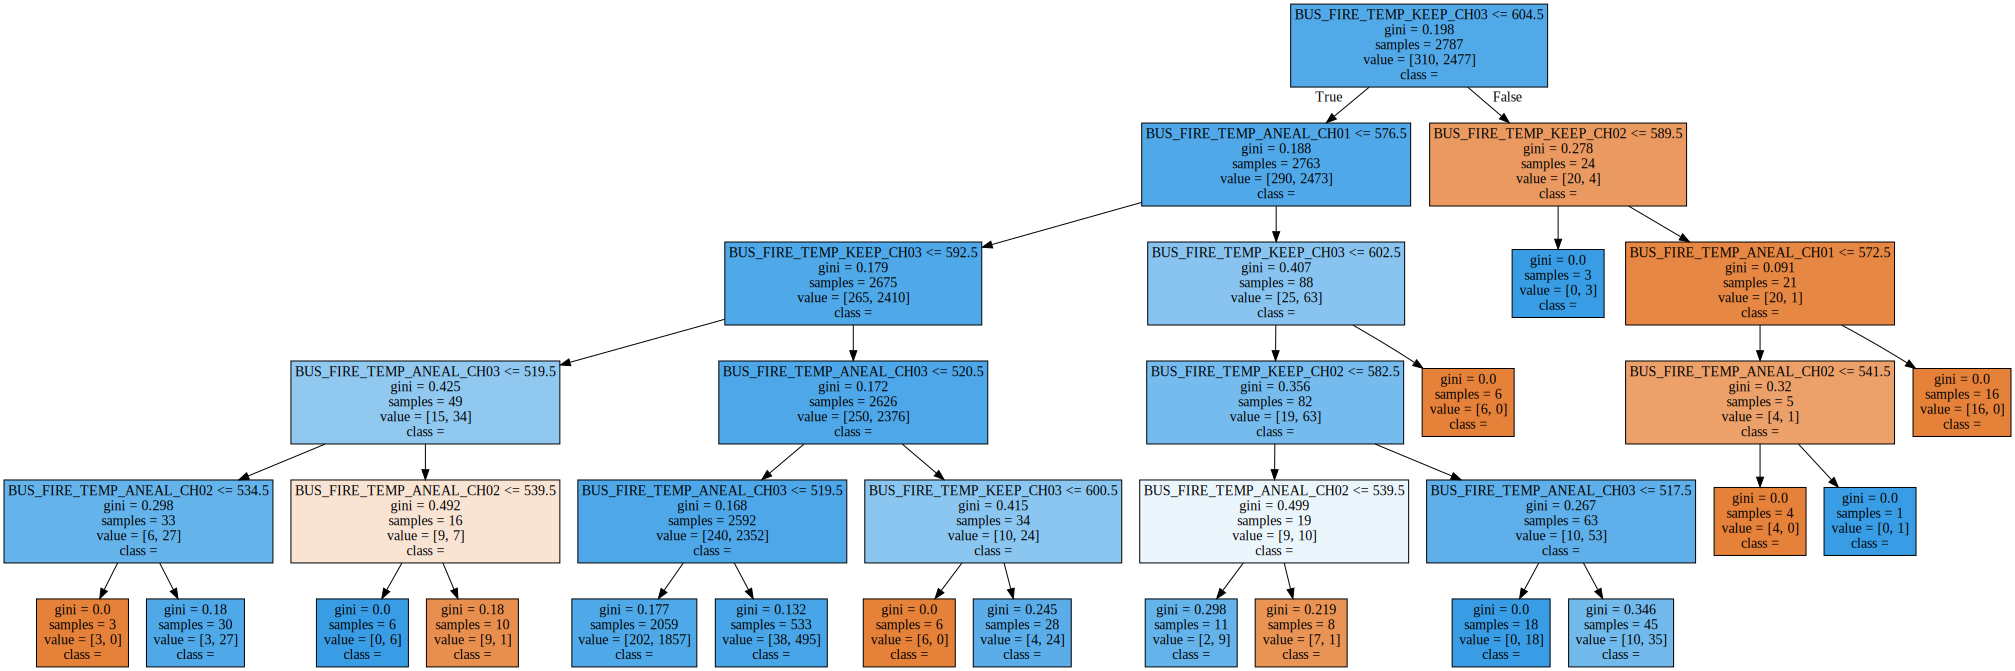

In [113]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, max_depth=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='BUS_FIRE.dot',class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('BUS_FIRE.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

# PHOS_R_DRY 의 설비 작업 조건 - vital few 도출

In [116]:
# drop: X변수와 변수 삭제
df_raw_x = df_process[['PHOS_R_DRY_TEMP_GLASS_START','PHOS_R_DRY_TEMP_GLASS_END','PHOS_R_DRY_TEMP_WALL_START','PHOS_R_DRY_TEMP_WALL_MAX','PHOS_R_DRY_PRES_START','PHOS_R_DRY_PRES_END','PHOS_R_DRY_TEMP_GLASS_OUT','PHOS_R_DRY_TEMP_HOOD_START','PHOS_R_DRY_TEMP_HOOD_MAX']]
df_raw_y = df_process["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [117]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 9)
train data Y size:(2787,)
test data X size:(1195, 9)
test data Y size:(1195,)


In [118]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합

y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))



Score on training set: 0.991
Score on test set: 0.900
Confusion matrix: 
[[  59   52]
 [  68 1016]]


In [120]:
df = pd.DataFrame(df_test_y)
# df.head()
# y_pred.unique()
# y_pred.value_counts()
# df.value_counts()
# df[0].unique()
df['JUDGE'].value_counts()

양품    1084
명점     111
Name: JUDGE, dtype: int64

In [121]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,PHOS_R_DRY_TEMP_HOOD_START,0.219
8,PHOS_R_DRY_TEMP_HOOD_MAX,0.207
3,PHOS_R_DRY_TEMP_WALL_MAX,0.147
4,PHOS_R_DRY_PRES_START,0.110
0,PHOS_R_DRY_TEMP_GLASS_START,0.098
6,PHOS_R_DRY_TEMP_GLASS_OUT,0.093
1,PHOS_R_DRY_TEMP_GLASS_END,0.043
5,PHOS_R_DRY_PRES_END,0.042
2,PHOS_R_DRY_TEMP_WALL_START,0.041


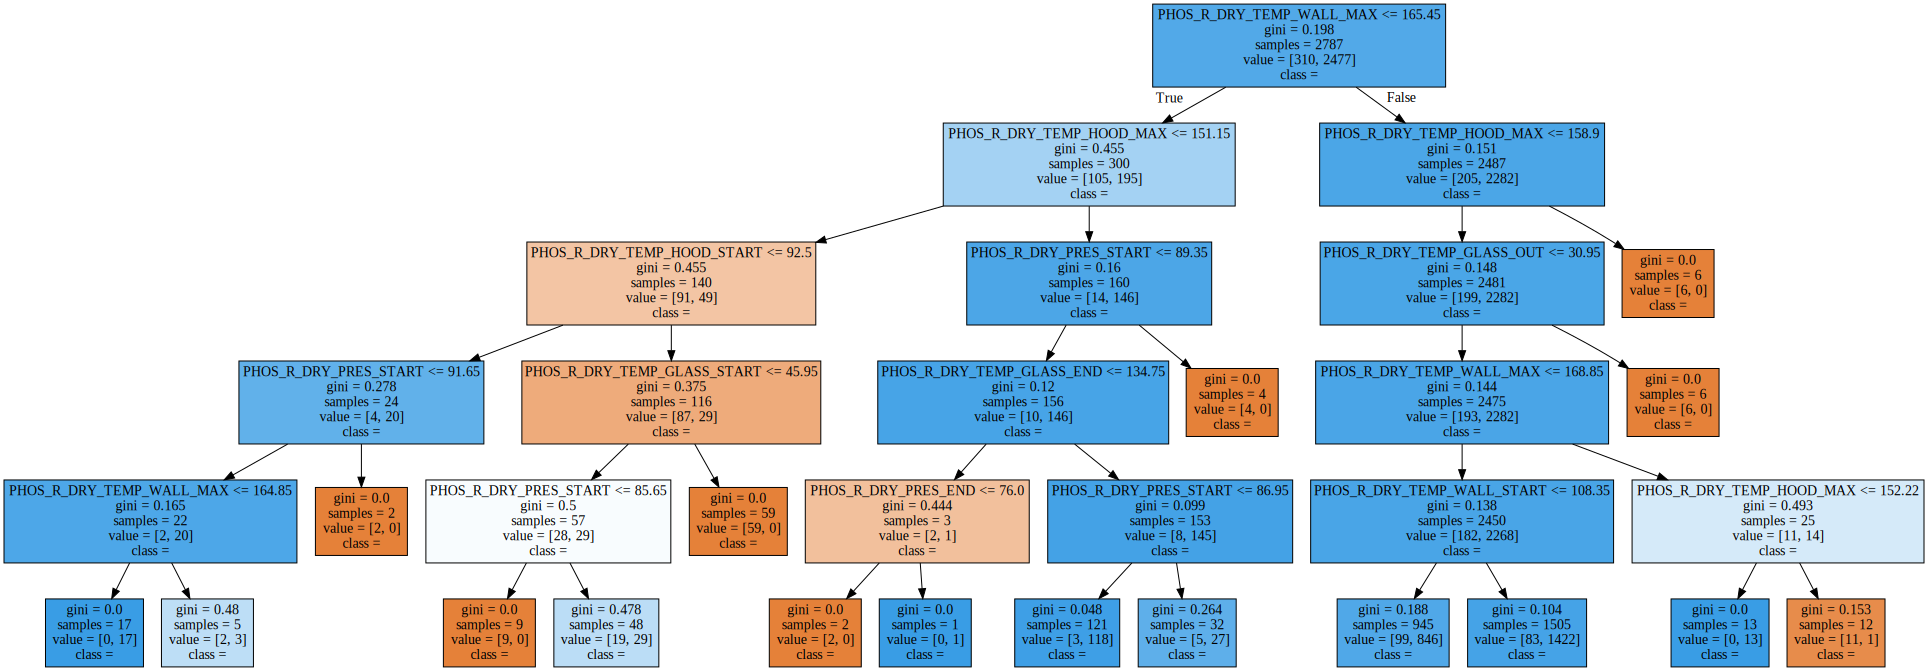

In [122]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, max_depth=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='PHOS_R_DRY.dot',class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('PHOS_R_DRY.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

# PHOS_G_DRY 의 설비 작업 조건 - vital few 도출

In [123]:
# drop: X변수와 변수 삭제
df_raw_x = df_process[['PHOS_G_DRY_TEMP_GLASS_START','PHOS_G_DRY_TEMP_GLASS_END','PHOS_G_DRY_TEMP_WALL_START','PHOS_G_DRY_TEMP_WALL_MAX','PHOS_G_DRY_PRES_START','PHOS_G_DRY_PRES_END','PHOS_G_DRY_TEMP_GLASS_OUT','PHOS_G_DRY_TEMP_HOOD_START','PHOS_G_DRY_TEMP_HOOD_MAX']]
df_raw_y = df_process["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [124]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 9)
train data Y size:(2787,)
test data X size:(1195, 9)
test data Y size:(1195,)


In [125]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [126]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합

y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))



Score on training set: 0.965
Score on test set: 0.931
Confusion matrix: 
[[  52   59]
 [  24 1060]]


In [127]:
df = pd.DataFrame(df_test_y)
# df.head()
# y_pred.unique()
# y_pred.value_counts()
# df.value_counts()
# df[0].unique()
df['JUDGE'].value_counts()

양품    1084
명점     111
Name: JUDGE, dtype: int64

In [128]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,PHOS_G_DRY_PRES_START,0.174
5,PHOS_G_DRY_PRES_END,0.166
0,PHOS_G_DRY_TEMP_GLASS_START,0.160
3,PHOS_G_DRY_TEMP_WALL_MAX,0.118
6,PHOS_G_DRY_TEMP_GLASS_OUT,0.096
1,PHOS_G_DRY_TEMP_GLASS_END,0.092
8,PHOS_G_DRY_TEMP_HOOD_MAX,0.074
7,PHOS_G_DRY_TEMP_HOOD_START,0.067
2,PHOS_G_DRY_TEMP_WALL_START,0.054


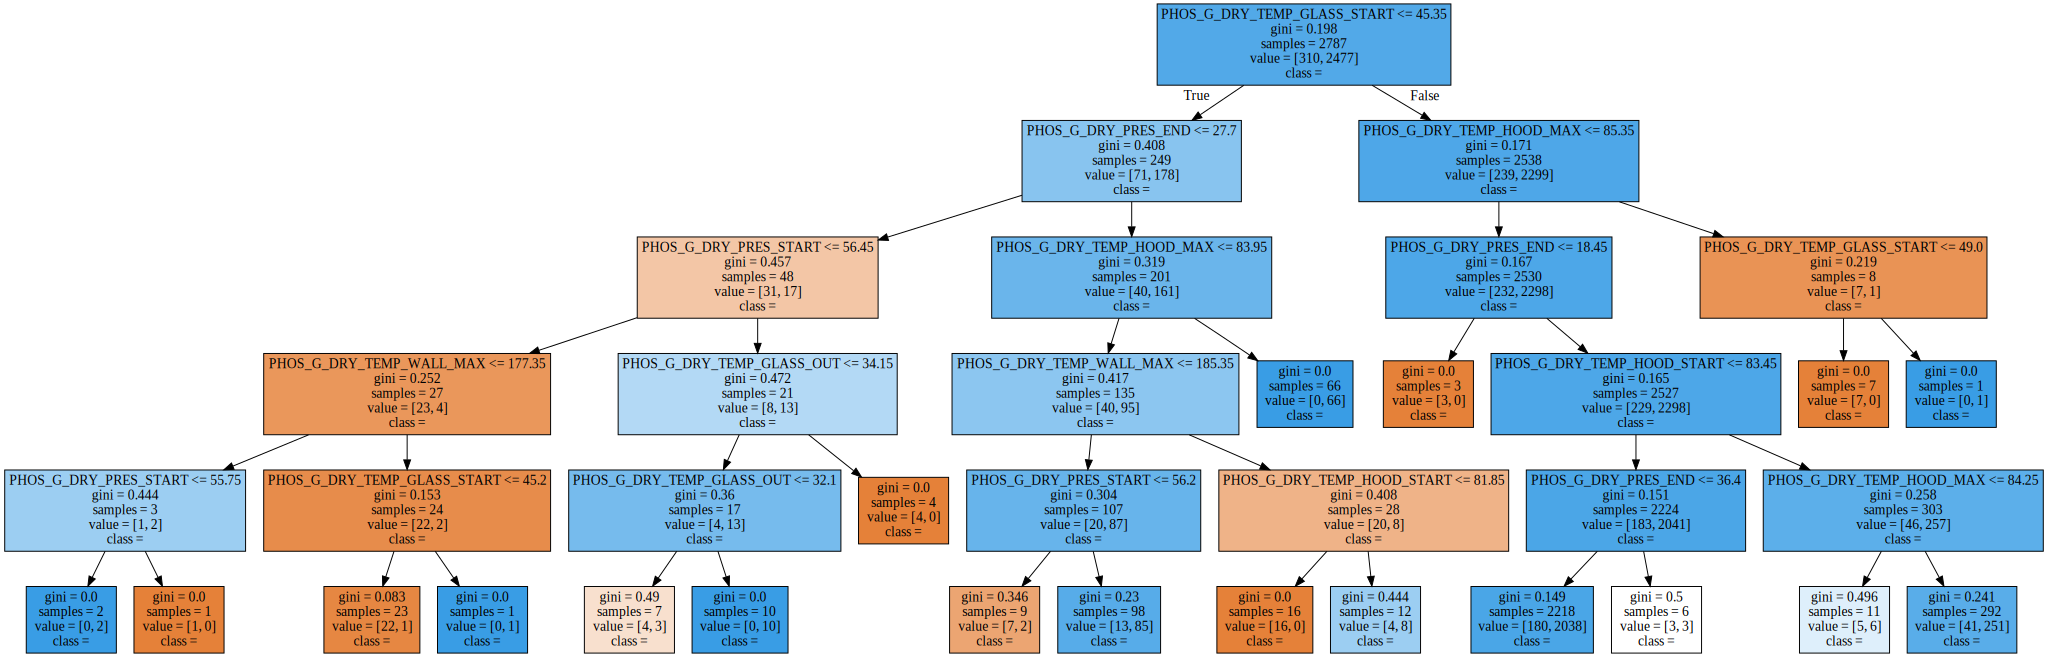

In [129]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, max_depth=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='PHOS_G_DRY.dot',class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('PHOS_G_DRY.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!

# PHOS_FIRE 의 설비 작업 조건 - vital few 도출

In [130]:
# drop: X변수와 변수 삭제
df_raw_x = df_process[['PHOS_FIRE_TEMP_ANEAL_CH01','PHOS_FIRE_TEMP_ANEAL_CH02','PHOS_FIRE_TEMP_ANEAL_CH03','PHOS_FIRE_TEMP_ANEAL_CH04','PHOS_FIRE_EXHAUST_HEAT1','PHOS_FIRE_EXHAUST_HEAT2','PHOS_FIRE_EXHAUST_HEAT3','PHOS_FIRE_EXHAUST_HEAT4']]
df_raw_y = df_process["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
# df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [131]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 8)
train data Y size:(2787,)
test data X size:(1195, 8)
test data Y size:(1195,)


In [132]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:

print('Score on training set: {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))

print('Score on test set: {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

# train 데이터에 과대적합

y_pred = tree_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y,y_pred)))



Score on training set: 0.966
Score on test set: 0.931
Confusion matrix: 
[[  55   56]
 [  26 1058]]


In [134]:
df = pd.DataFrame(df_test_y)
# df.head()
# y_pred.unique()
# y_pred.value_counts()
# df.value_counts()
# df[0].unique()
df['JUDGE'].value_counts()

양품    1084
명점     111
Name: JUDGE, dtype: int64

In [135]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,PHOS_FIRE_EXHAUST_HEAT3,0.241
5,PHOS_FIRE_EXHAUST_HEAT2,0.208
4,PHOS_FIRE_EXHAUST_HEAT1,0.207
7,PHOS_FIRE_EXHAUST_HEAT4,0.177
2,PHOS_FIRE_TEMP_ANEAL_CH03,0.072
0,PHOS_FIRE_TEMP_ANEAL_CH01,0.050
1,PHOS_FIRE_TEMP_ANEAL_CH02,0.025
3,PHOS_FIRE_TEMP_ANEAL_CH04,0.020


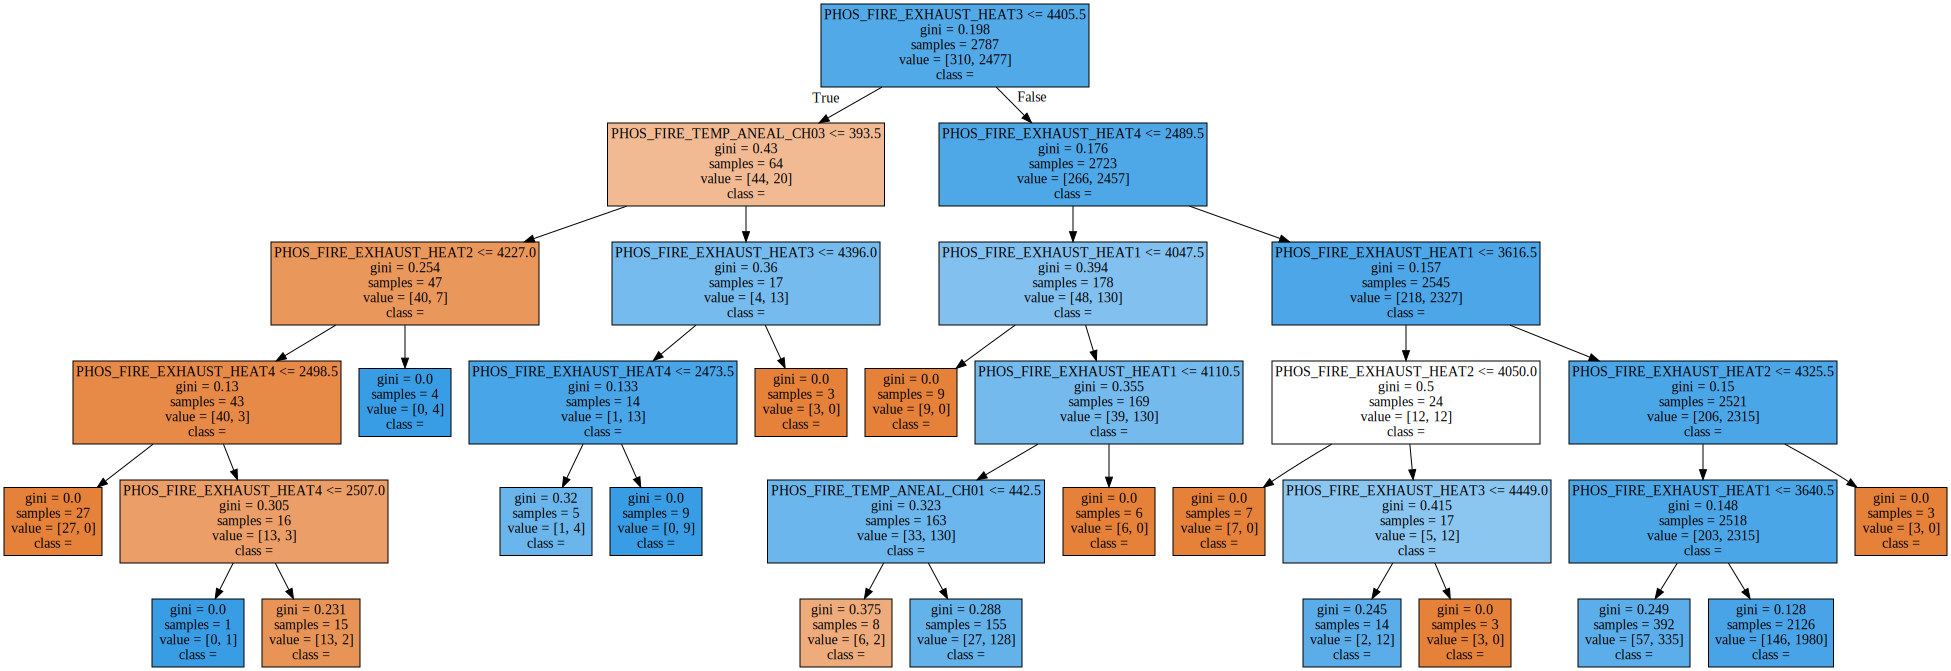

In [136]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeClassifier(random_state=1234, max_depth=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='PHOS_FIRE.dot',class_names=['명점','양품'],
               feature_names=v_feature_name, impurity=True, filled=True) # filled = True : 색 그라데이션
with open('PHOS_FIRE.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# mse가 줄어드는 방향으로 분리!